# Decision Trees

This notebook presents a comprehensive guide on building a decision tree model, optimising the `max_depth` parameter, and visualising the decision tree. We will start by loading the Iris dataset and preparing the data for training. Subsequently, we will construct a decision tree classifier and explore various maximum depth values to enhance model performance. After evaluating the accuracy of the model, we will visualise the decision tree using both Graphviz and Matplotlib, providing valuable insights into the model's decision-making process.

## Fitting a Decision Tree

In [1]:
# Import libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call


In [2]:
# Load the Iris dataset
iris = load_iris()

# Assign feature data and target labels from the Iris dataset
X = iris.data[:, ]
y = iris.target

# Split data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X,
                y, test_size=0.25, random_state=49)

In [3]:
# Train a Decision Tree Classifier without pruning (max_depth=None)
unpruned = DecisionTreeClassifier(max_depth=None, random_state=49)

# Fit the model to the training data
unpruned.fit(X_train, y_train)
print("Performance without pruning:", unpruned.score(X_test, y_test))

# Print the maximum depth of the unpruned tree
print("At depth:", unpruned.tree_.max_depth)

Performance without pruning: 0.9473684210526315
At depth: 7


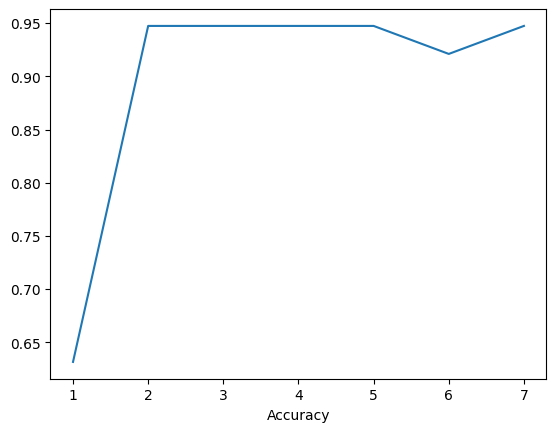

In [4]:
# Define the range of pruning depths
pruned_depths = range(1,unpruned.tree_.max_depth+1)

pruned_scores = []
# Loop through each depth value to evaluate the model's performance
for d in pruned_depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=4)
    clf.fit(X_train, y_train)

    # Calculate the accuracy of the model on the test set and append it to the list
    score = clf.score(X_test, y_test)
    pruned_scores.append(score)

# Plot the accuracy scores against the pruning depths
fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores)
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

In [5]:
# Find the best depth by identifying the index of the maximum score
best_depth = pruned_depths[np.argmax(pruned_scores)]
print('Best performance reached at depth of:', best_depth)

# Create and fit a new Decision Tree Classifier using the best depth found
pruned = DecisionTreeClassifier(max_depth=best_depth)
pruned.fit(X, y)

Best performance reached at depth of: 2


DecisionTreeClassifier(max_depth=2)

## Visualisation





### Visualising Decision Tree using Graphviz
To visualise a decision tree using Graphviz, we first check if the Graphviz library is installed. If it is, we can export the decision tree structure to a DOT file using the export_graphviz() function. This function takes several parameters, including the fitted model, output file name, feature names, and visual attributes like rounded corners and filled nodes. Once the tree is exported to a DOT file, we can convert it to a PNG image using a system command that calls the Graphviz 'dot' utility. This results in a high-quality visual representation of the tree.

If you wish to use Graphviz, follow the install instructions [here](https://graphviz.readthedocs.io/en/stable/manual.html).

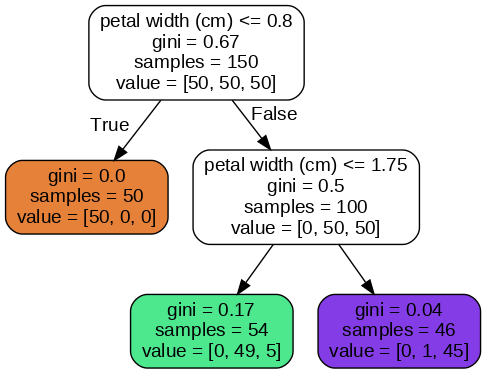

In [6]:
# Export the tree to a DOT file
export_graphviz(pruned, out_file='pruned_tree.dot', feature_names = iris.feature_names,
                  rounded = True, proportion = False, precision = 2, filled = True)

# Convert to png using system command
call(['dot', '-Tpng', 'pruned_tree.dot', '-o', 'pruned_tree.png', '-Gdpi=100'])

# Display the image
Image(filename='pruned_tree.png')


### Visualising Decision Trees using plot_tree()

If Graphviz is not installed or if you prefer a simpler approach, you can visualize the decision tree using Matplotlib's plot_tree() function. This function directly plots the decision tree based on the fitted model without needing to export it to a DOT file first. You can specify the same visual attributes as in the Graphviz method, allowing for a clear and informative visualisation of the tree structure. After plotting, you can save the figure as a PNG file for later reference.

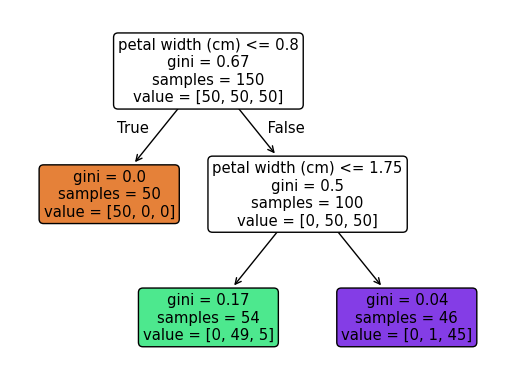

In [7]:
fig = plt.figure()
# Plot the decision tree
tree.plot_tree(pruned, feature_names=iris.feature_names,
               rounded=True, proportion=False, precision=2, filled=True)
# Save the generated tree plot as a PNG file named 'pruned_tree1.png'
fig.savefig('pruned_tree1.png')


### Visualising Decison Trees on a scatter plot.

Visualising the predictions of our decision tree on a scatter plot helps us understand how the model's decision boundaries change with increasing tree depth. As the depth increases, the model becomes more complex, allowing it to create finer divisions in the feature space, leading to more precise classifications. Each point on the scatter plot represents a data sample, with the decision boundaries indicating different predicted classes. While deeper trees can improve fit on training data, they also risk overfitting, making it crucial to balance complexity with generalisation. This visualisation provides valuable insights into the model's behaviour and performance.

In [8]:
# Isolate only 2 features (sepal width and length) to allow visualisation on a 2d scale
X_sep = iris.data[:,[0,1]]

<ipython-input-9-b4c586a7a76e>:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_sep[idx, 0], X_sep[idx, 1], c=color,
<ipython-input-9-b4c586a7a76e>:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_sep[idx, 0], X_sep[idx, 1], c=color,
<ipython-input-9-b4c586a7a76e>:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_sep[idx, 0], X_sep[idx, 1], c=color,
<ipython-input-9-b4c586a7a76e>:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_sep[idx, 0], X_sep[idx, 1], c=color,
<ipython-input-9-b4c586a7a76e>:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_sep[idx, 0], X_sep[idx, 1], c=color,


<Figure size 640x480 with 0 Axes>

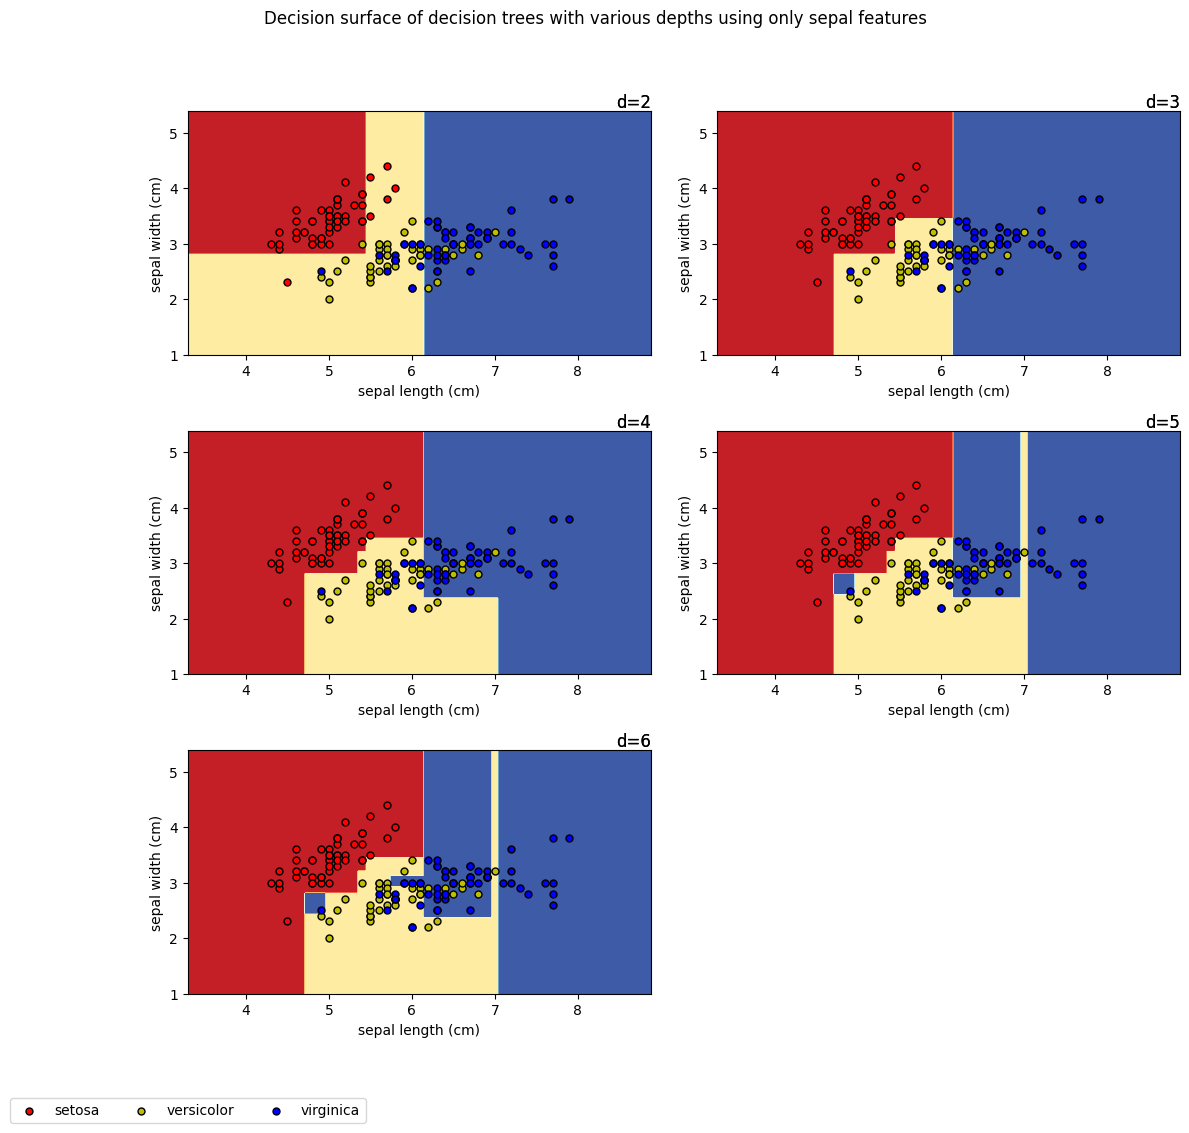

In [9]:
plt.suptitle("Decision surface of decision trees with various depths using only sepal features")

# Adjust this list according to the desired max_depth values
pruned_depths = [2, 3, 4, 5, 6]

# Set up the figure and main title
plt.figure(figsize=(12, 12))
plt.suptitle("Decision surface of decision trees with various depths using only sepal features")

# Determine the number of depths and the required subplot rows
num_depths = len(pruned_depths)
rows = (num_depths + 1) // 2  # Calculate the number of rows needed for subplots

# Make subplots for each depth
for idx, d in enumerate(pruned_depths):
    ax = plt.subplot(rows, 2, idx + 1)  # Create a subp

    # Determine the limits for the feature space based on the input data
    x_min, x_max = X_sep[:, 0].min() - 1, X_sep[:, 0].max() + 1
    y_min, y_max = X_sep[:, 1].min() - 1, X_sep[:, 1].max() + 1

    # Create a mesh grid for plotting decision boundaries
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Create and fit the Decision Tree Classifier for the current max_depth
    clf = DecisionTreeClassifier(max_depth=d).fit(X_sep, y)

    # Predict the class labels for each point in the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundaries using contour plot
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    # Set the labels for the axes
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

    # Set the title for the current subplot indicating the current max_depth
    ax.title = plt.title('d={}'.format(d), loc='right', pad=-15)

    # Plot the training points for each class
    for i, color in zip(range(3), "ryb"):
        idx = np.where(y == i)  # Get indices for the current class
        plt.scatter(X_sep[idx, 0], X_sep[idx, 1], c=color,
                    label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=25)

# Add a legend to the plot
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0, -0.40))

# Adjust layout for better spacing and prevent overlaps
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


The above code visualizes the decision boundaries of a Decision Tree Classifier applied to the Iris dataset, focusing on its first two features. It generates multiple subplots, each representing a different maximum depth for the decision tree.

For each subplot, the code calculates the limits of the [feature space](https://dataorigami.net/2014/06/06/Feature-Space-in-Machine-Learning.html) and creates a [mesh grid](https://thepythoncodingbook.com/2022/05/28/numpy-meshgrid/) to cover this area. It then fits the Decision Tree Classifier to the training data for the specified depth, predicts class labels for the mesh grid points, and plots the resulting decision boundaries as contour plots. The training data points are also overlaid on these plots, illustrating how well the model's predictions correspond to the actual classes.

This visualisation helps in understanding how the model's complexity, indicated by the maximum depth, affects its classification performance, offering insights into potential overfitting or underfitting.